In [1]:
# from future import print_function, division
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

In [2]:
wordnet_lemmatizer = WordNetLemmatizer()

In [3]:
titles = [line.rstrip() for line in open('all_book_titles.txt')]

In [4]:
stopwords = set(w.rstrip() for w in open('stopwords.txt'))

In [5]:
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

In [6]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [7]:
word_index_map = {}
curent_index = 0
all_tokens = []
all_titles = []
index_word_map = []
error_count = 0

In [8]:
for title in titles:
    try:
        title = title.encode('ascii','ignore').decode('utf-8')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = curent_index
                curent_index += 1 
                index_word_map.append(token)
    except Exception as e:
        print(e)
        print(title)
        error_count += 1
        

In [9]:
index_word_map

['philosophy',
 'sex',
 'love',
 'reader',
 'reading',
 'judaism',
 'christianity',
 'islam',
 'microprocessor',
 'principle',
 'bernhard',
 'edouard',
 'fernow',
 'story',
 'north',
 'american',
 'forestry',
 'encyclopedia',
 'buddhism',
 'motorola',
 'family',
 'programming',
 'interfacing',
 'anthem',
 'student',
 'modern',
 'era',
 'read',
 'literature',
 'professor',
 'lively',
 'entertaining',
 'line',
 'mar',
 'woman',
 'venus',
 'secret',
 'improving',
 'communication',
 'lasting',
 'intimacy',
 'fulfillment',
 'giving',
 'receiving',
 'passion',
 'understanding',
 'martian',
 'religious',
 'tradition',
 'world',
 'journey',
 'africa',
 'mesoamerica',
 'america',
 'hinduism',
 'china',
 'wisdom',
 'sacred',
 'text',
 'religion',
 'illustrated',
 'soul',
 'cultivating',
 'life',
 'act',
 'thriving',
 'chaos',
 'handbook',
 'management',
 'revolution',
 'blood',
 'relative',
 'wheelock',
 'latin',
 'choice',
 'uncertainty',
 'luck',
 'thrive',
 'despite',
 'expanding',
 'discours

In [10]:
word_index_map

{'philosophy': 0,
 'sex': 1,
 'love': 2,
 'reader': 3,
 'reading': 4,
 'judaism': 5,
 'christianity': 6,
 'islam': 7,
 'microprocessor': 8,
 'principle': 9,
 'bernhard': 10,
 'edouard': 11,
 'fernow': 12,
 'story': 13,
 'north': 14,
 'american': 15,
 'forestry': 16,
 'encyclopedia': 17,
 'buddhism': 18,
 'motorola': 19,
 'family': 20,
 'programming': 21,
 'interfacing': 22,
 'anthem': 23,
 'student': 24,
 'modern': 25,
 'era': 26,
 'read': 27,
 'literature': 28,
 'professor': 29,
 'lively': 30,
 'entertaining': 31,
 'line': 32,
 'mar': 33,
 'woman': 34,
 'venus': 35,
 'secret': 36,
 'improving': 37,
 'communication': 38,
 'lasting': 39,
 'intimacy': 40,
 'fulfillment': 41,
 'giving': 42,
 'receiving': 43,
 'passion': 44,
 'understanding': 45,
 'martian': 46,
 'religious': 47,
 'tradition': 48,
 'world': 49,
 'journey': 50,
 'africa': 51,
 'mesoamerica': 52,
 'america': 53,
 'hinduism': 54,
 'china': 55,
 'wisdom': 56,
 'sacred': 57,
 'text': 58,
 'religion': 59,
 'illustrated': 60,
 's

In [11]:
print('Number of errors', error_count, 'number of lines in the file:',len(titles))
if error_count == len(titles):
    print('there is not data')

Number of errors 0 number of lines in the file: 2373


In [12]:
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

In [13]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D,N))
i = 0

In [14]:
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1

In [15]:
def main():
    svd = TruncatedSVD()
    Z = svd.fit_transform(X)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(D):
        plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
    plt.show()

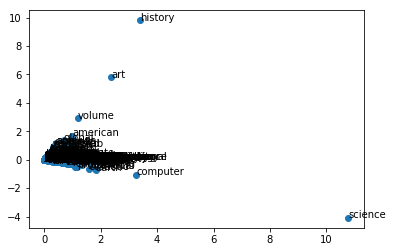

In [16]:
main()

In [17]:
Z

NameError: name 'Z' is not defined